In [23]:
# %pip install pandas
# %pip install numpy
# %pip install plotly
# %pip install statsmodels
# %pip install nbformat
%pip install --upgrade jupyterlab notebook ipywidgets




   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.3 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/12.3 MB 4.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.3 MB 3.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.3 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/12.3 MB 4.9 MB/s eta 0:00:02
   ----------------------- ---------------- 7.1/12.3 MB 5.5 MB/s eta 0:00:01
   -------------------------- ------------- 8.1/12.3 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 10.0/12.3 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 11.5/12.3 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   -- ------------------------------------- 1.0/14.3 MB 5.3 MB/s eta 0:00:03
   ------ 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [9]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv('supply_chain_data.csv')
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [11]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [26]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 8.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 8.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.7 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [28]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


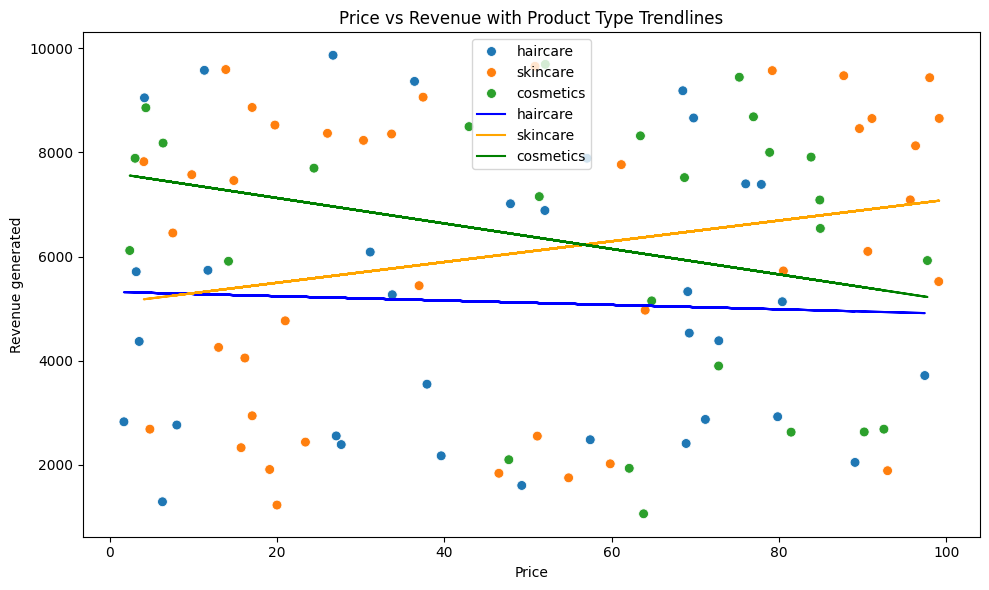

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Example data (remove this if you already have your `data` DataFrame)
# data = pd.read_csv("your_file.csv")

# Plot scatter with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Revenue generated', hue='Product type', s=50)

# Separate trendlines for each Product type
colors = {'haircare': 'blue', 'skincare': 'Orange', 'cosmetics': 'green'}

for product, color in colors.items():
    subset = data[data['Product type'] == product]
    X = subset['Price']
    Y = subset['Revenue generated']
    
    if len(X) > 1:  # Make sure there's enough data
        X_ols = sm.add_constant(X)
        model = sm.OLS(Y, X_ols).fit()
        Y_pred = model.predict(X_ols)
        plt.plot(X, Y_pred, color=color, linestyle='-' if color != 'blue' else '-', label=product)

# Labels and layout
plt.xlabel('Price')
plt.ylabel('Revenue generated')
plt.title('Price vs Revenue with Product Type Trendlines')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


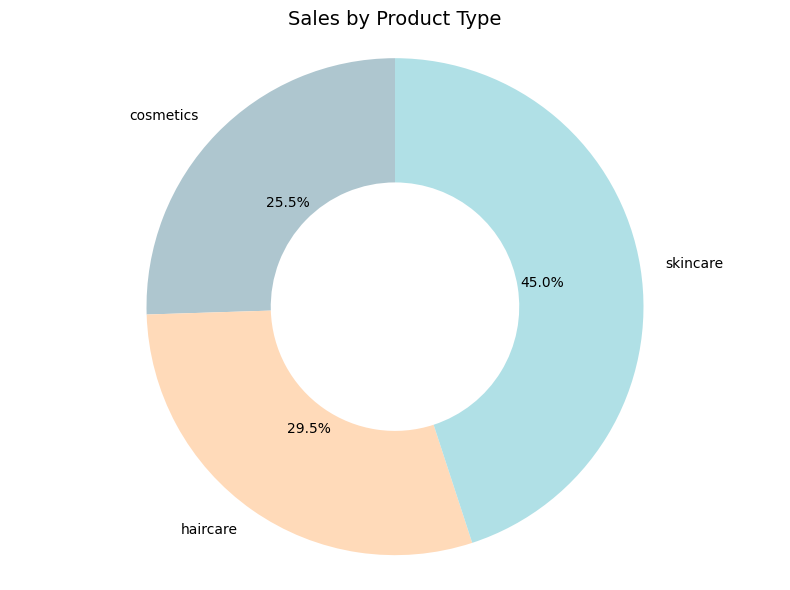

In [55]:
import matplotlib.pyplot as plt

# Group the data
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

# Pie chart values and labels
labels = sales_data['Product type']
sizes = sales_data['Number of products sold']

# Colors similar to Plotly's pastel (approximate)
colors = ['#AEC6CF', '#FFDAB9', '#B0E0E6']  # You can customize this

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color': 'black'},
    wedgeprops=dict(width=0.5)  # Makes it a donut
)

# Center title
plt.title('Sales by Product Type', fontsize=14)
plt.axis('equal')  # Equal aspect ratio makes the chart circular
plt.tight_layout()
plt.show()


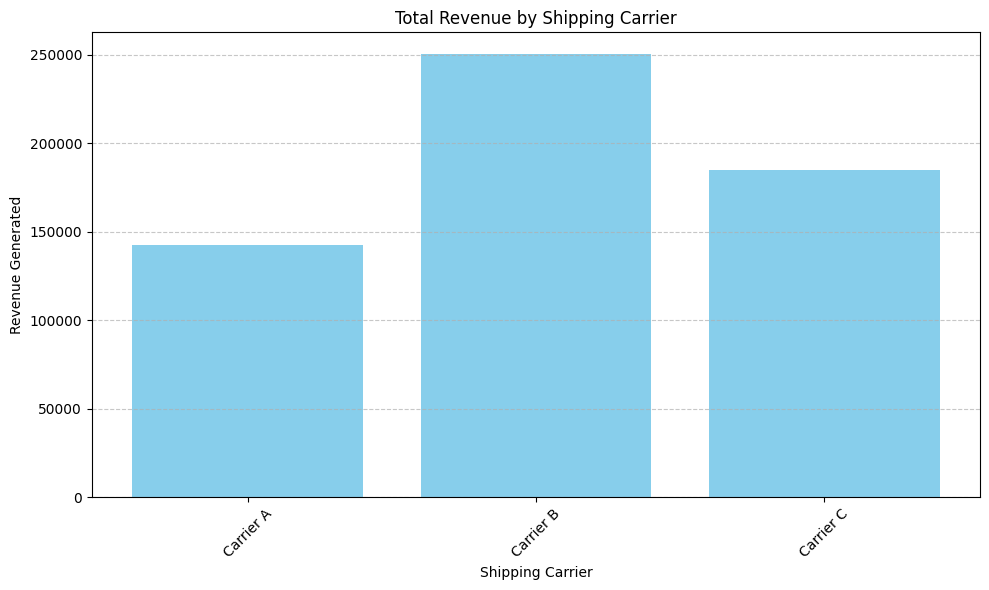

In [57]:
import matplotlib.pyplot as plt

# Grouping the data
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(total_revenue['Shipping carriers'], total_revenue['Revenue generated'], color='skyblue')

# Labels and title
plt.xlabel('Shipping Carrier')
plt.ylabel('Revenue Generated')
plt.title('Total Revenue by Shipping Carrier')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [58]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


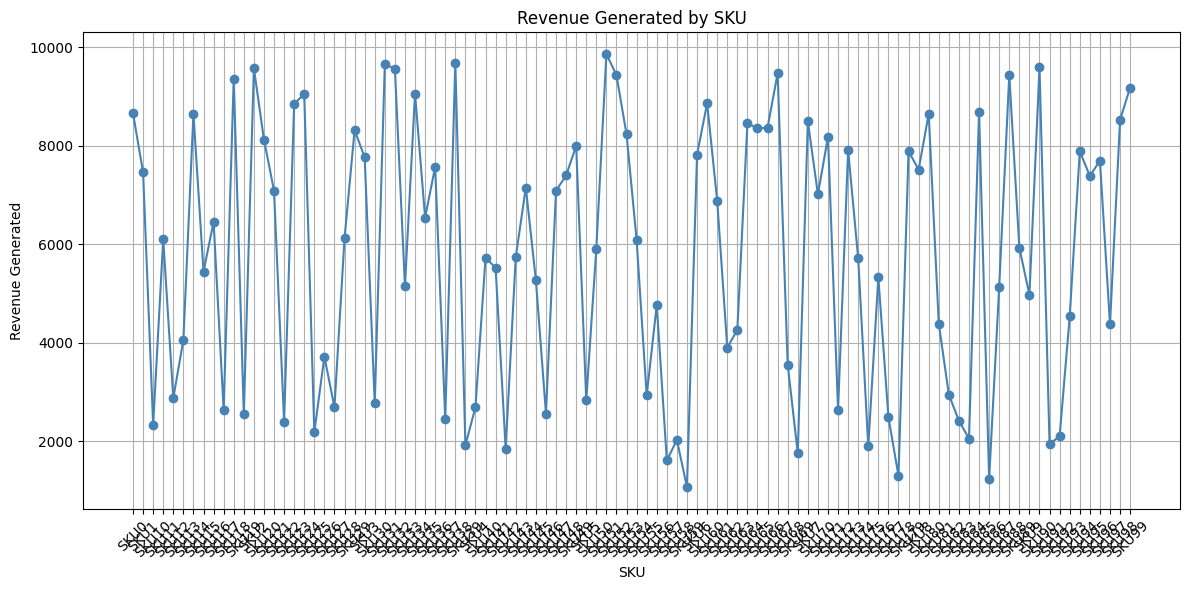

In [60]:
import matplotlib.pyplot as plt

# Sort data by SKU (optional but helps with ordering)
data_sorted = data.sort_values(by='SKU')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['SKU'], data_sorted['Revenue generated'], marker='o', color='steelblue')

# Labels and title
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by SKU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

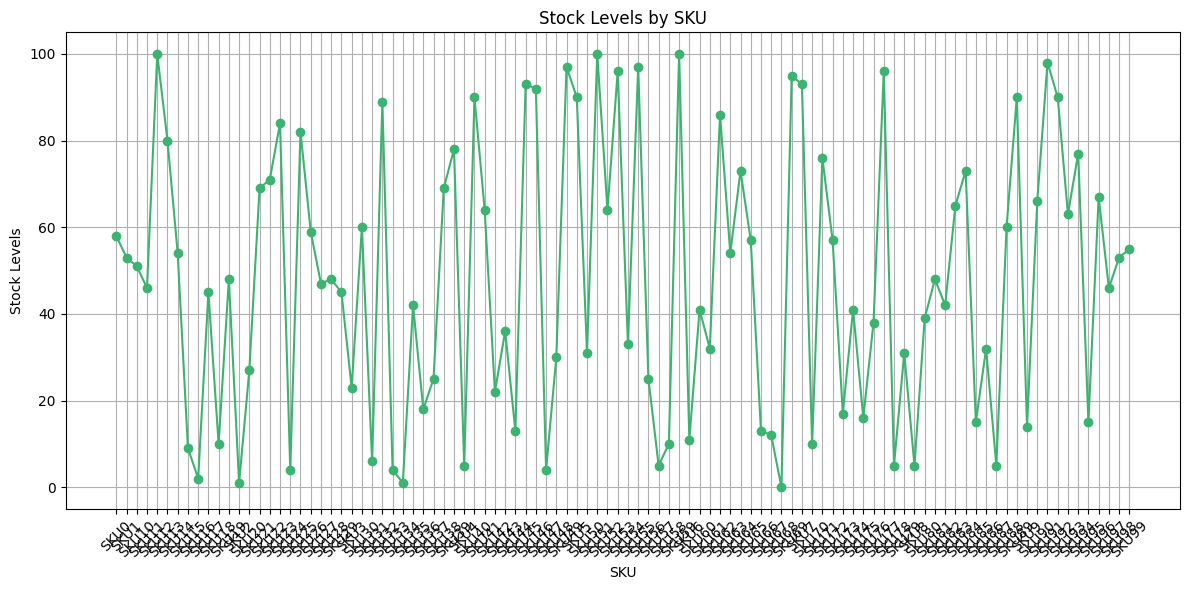

In [61]:
import matplotlib.pyplot as plt

# Optional: Sort SKUs alphabetically or numerically for cleaner lines
data_sorted = data.sort_values(by='SKU')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['SKU'], data_sorted['Stock levels'], marker='o', color='mediumseagreen')

# Labels and title
plt.xlabel('SKU')
plt.ylabel('Stock Levels')
plt.title('Stock Levels by SKU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

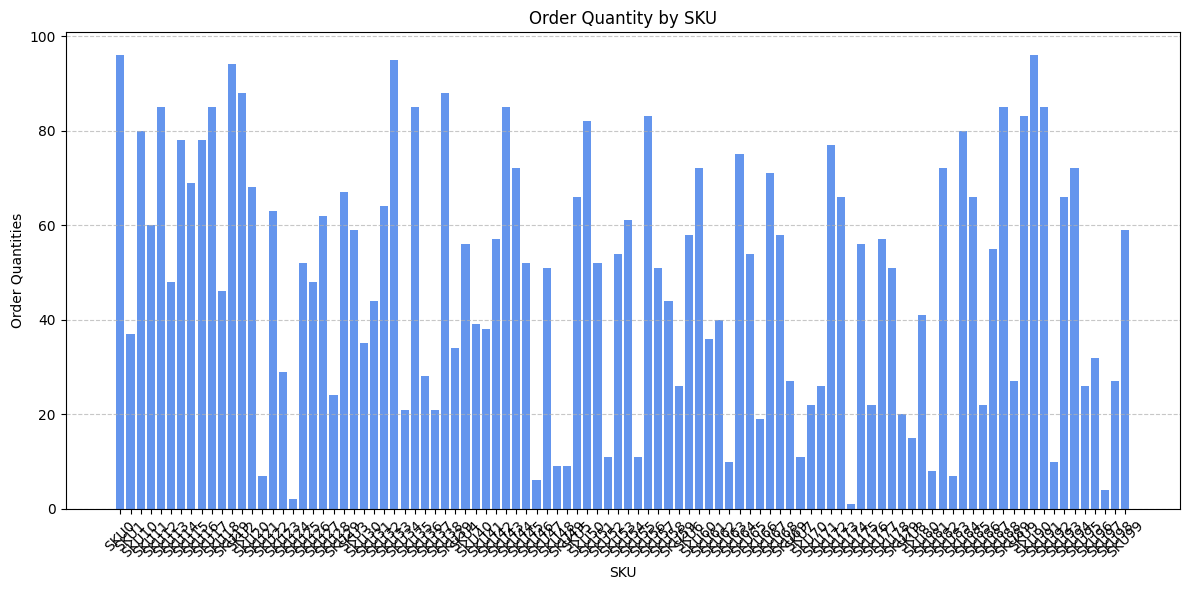

In [62]:
import matplotlib.pyplot as plt

# Optional: sort for better visuals
data_sorted = data.sort_values(by='SKU')

plt.figure(figsize=(12, 6))
plt.bar(data_sorted['SKU'], data_sorted['Order quantities'], color='cornflowerblue')

# Labels and title
plt.xlabel('SKU')
plt.ylabel('Order Quantities')
plt.title('Order Quantity by SKU')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

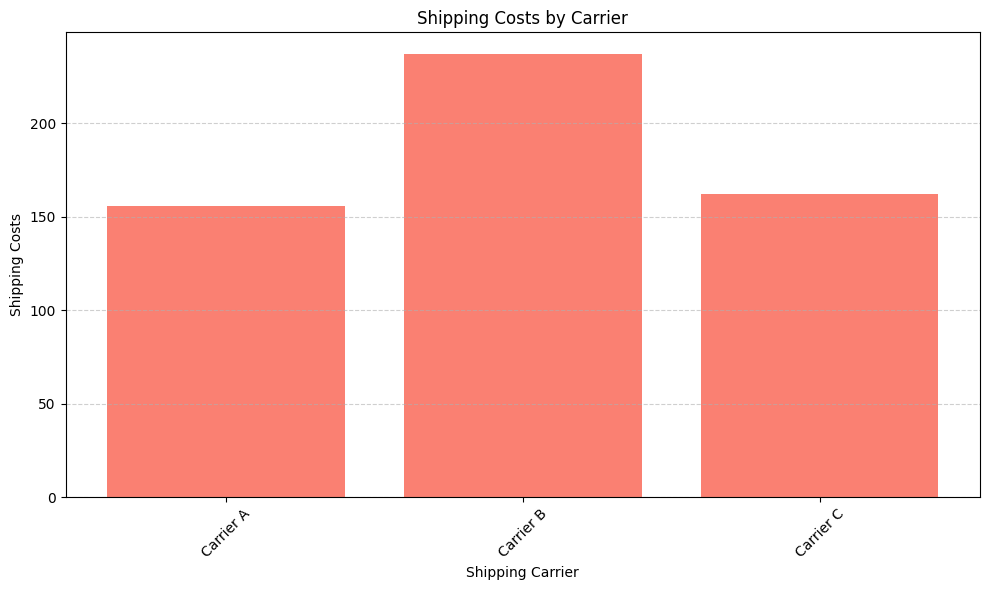

In [63]:
import matplotlib.pyplot as plt

# Optional: Aggregate if there are multiple entries per carrier
shipping_data = data.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(shipping_data['Shipping carriers'], shipping_data['Shipping costs'], color='salmon')

plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')
plt.title('Shipping Costs by Carrier')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

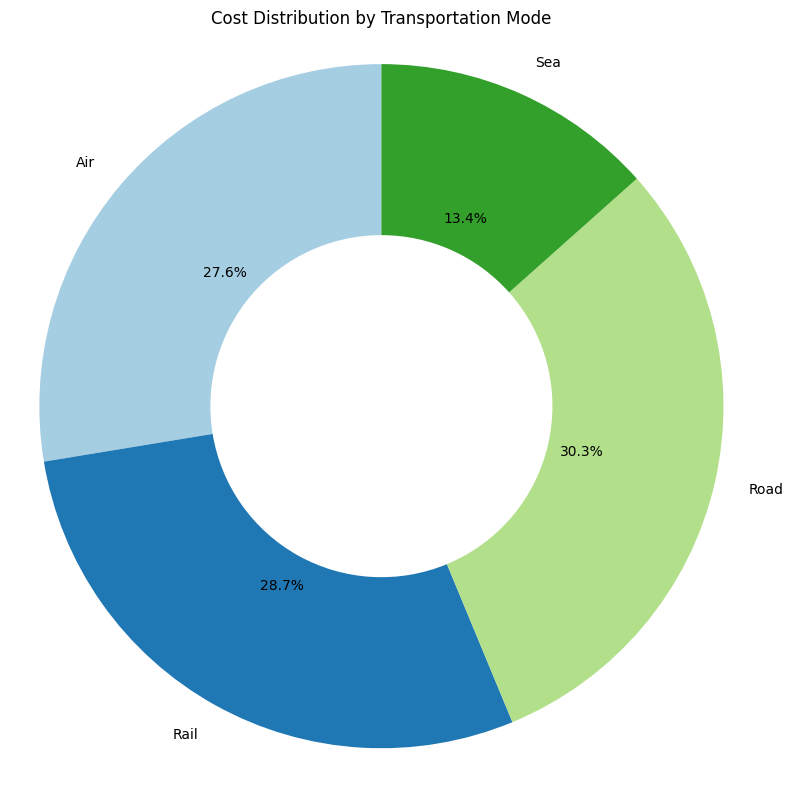

In [64]:
import matplotlib.pyplot as plt

# Group data by transportation mode and sum costs
transportation_data = data.groupby('Transportation modes')['Costs'].sum().reset_index()

# Plotting donut chart
plt.figure(figsize=(8, 8))
plt.pie(transportation_data['Costs'], labels=transportation_data['Transportation modes'], 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'width': 0.5})

# Title
plt.title('Cost Distribution by Transportation Mode')

# Equal aspect ratio ensures the pie is circular.
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

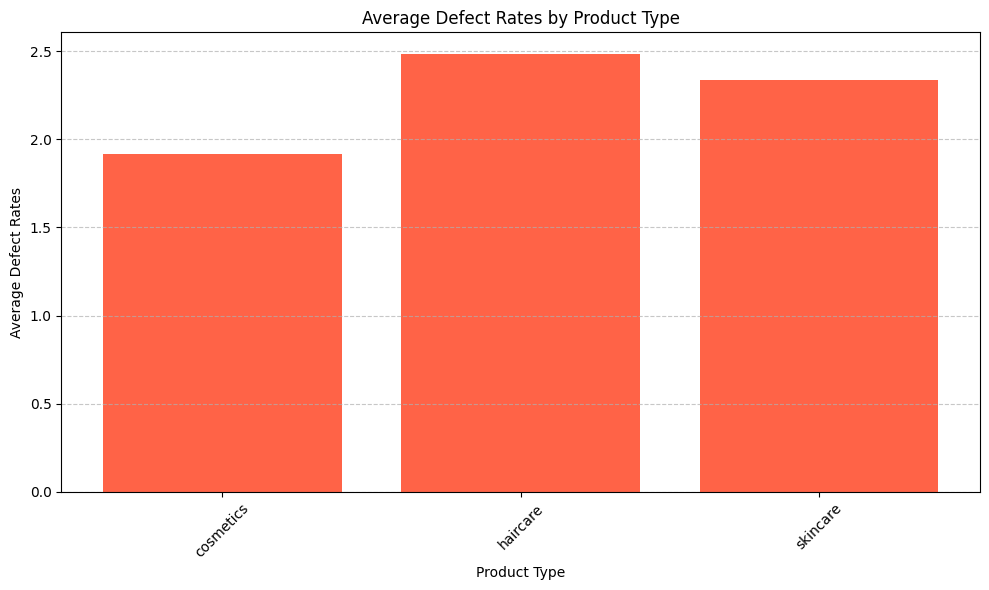

In [65]:
import matplotlib.pyplot as plt

# Group by product type and calculate mean defect rates
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(defect_rates_by_product['Product type'], defect_rates_by_product['Defect rates'], color='tomato')

# Adding labels and title
plt.xlabel('Product Type')
plt.ylabel('Average Defect Rates')
plt.title('Average Defect Rates by Product Type')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show gridlines on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

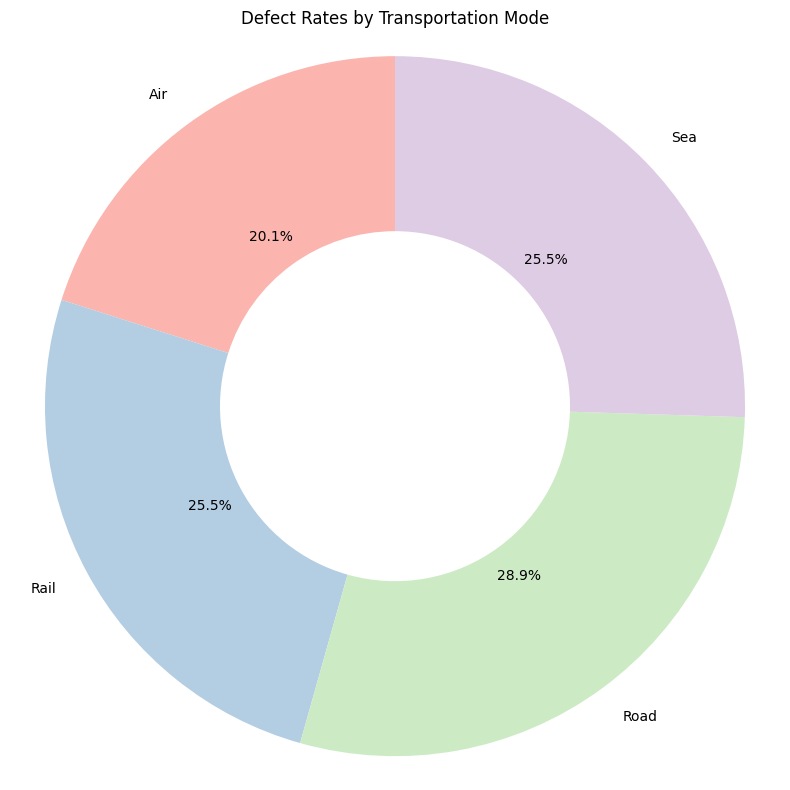

In [66]:
import matplotlib.pyplot as plt

# Create pivot table (average defect rates per transportation mode)
pivot_table = data.groupby('Transportation modes')['Defect rates'].mean()

# Plotting donut chart
plt.figure(figsize=(8, 8))
plt.pie(pivot_table, labels=pivot_table.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Pastel1.colors, wedgeprops={'width': 0.5})

# Title
plt.title('Defect Rates by Transportation Mode')

# Equal aspect ratio ensures the pie is circular.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()